# PySpark
## Introduction
PySpark is a Spark library written in Python to run Python applications using Apache Spark capabilities, using PySpark we can run applications parallelly on the distributed cluster (multiple nodes).

In other words, PySpark is a Python API for Apache Spark. Apache Spark is an analytical processing engine for large scale powerful distributed data processing and machine learning applications.

Spark basically written in Scala and later on due to its industry adaptation it’s API PySpark released for Python using Py4J. Py4J is a Java library that is integrated within PySpark and allows python to dynamically interface with JVM objects, hence to run PySpark you also need Java to be installed along with Python, and Apache Spark.

Additionally, For the development, you can use Anaconda distribution (widely used in the Machine Learning community) which comes with a lot of useful tools like Spyder IDE, Jupyter notebook to run PySpark applications.

In real-time, PySpark has used a lot in the machine learning & Data scientists community; thanks to vast python machine learning libraries. Spark runs operations on billions and trillions of data on distributed clusters 100 times faster than the traditional python applications.

## Features
Following are the main features of PySpark.
* In-memory computation
* Distributed processing using parallelize
* Can be used with many cluster managers (Spark, Yarn, Mesos e.t.c)
* Fault-tolerant
* Immutable
* Lazy evaluation
* Cache & persistence
* Inbuild-optimization when using DataFrames
* Supports ANSI SQL

## Advantages of PySpark
* PySpark is a general-purpose, in-memory, distributed processing engine that allows you to process data efficiently in a distributed fashion.
* Applications running on PySpark are 100x faster than traditional systems.
* You will get great benefits using PySpark for data ingestion pipelines.
* Using PySpark we can process data from Hadoop HDFS, AWS S3, and many file systems.
* PySpark also is used to process real-time data using Streaming and Kafka.
* Using PySpark streaming you can also stream files from the file system and also stream from the socket.
* PySpark natively has machine learning and graph libraries.

## PySpark Architecture
Apache Spark works in a master-slave architecture where the master is called “Driver” and slaves are called “Workers”. When you run a Spark application, Spark Driver creates a context that is an entry point to your application, and all operations (transformations and actions) are executed on worker nodes, and the resources are managed by Cluster Manager.

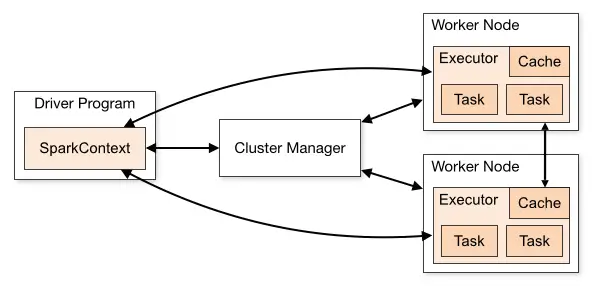

## Cluster Manager Types
As of writing this Spark with Python (PySpark) tutorial, Spark supports below cluster managers:

* Standalone – a simple cluster manager included with Spark that makes it easy to set up a cluster.
* Apache Mesos – Mesons is a Cluster manager that can also run Hadoop MapReduce and PySpark applications.
* Hadoop YARN – the resource manager in Hadoop 2. This is mostly used, cluster manager.
* Kubernetes – an open-source system for automating deployment, scaling, and management of containerized applications.
* local – which is not really a cluster manager but still I wanted to mention as we use “local” for master() in order to run Spark on your laptop/computer.

## PySpark Modules & Packages
* PySpark RDD (pyspark.RDD)
* PySpark DataFrame and SQL (pyspark.sql)
* PySpark Streaming (pyspark.streaming)
* PySpark MLib (pyspark.ml, pyspark.mllib)
* PySpark GraphFrames (GraphFrames)
* PySpark Resource (pyspark.resource) - It’s new in PySpark 3.0

Besides these, if you wanted to use third-party libraries, you can find them at https://spark-packages.org/ . This page is kind of a repository of all Spark third-party libraries.

## PySpark RDD – Resilient Distributed Dataset
PySpark RDD (Resilient Distributed Dataset) is a fundamental data structure of PySpark that is fault-tolerant, immutable distributed collections of objects, which means once you create an RDD you cannot change it. Each dataset in RDD is divided into logical partitions, which can be computed on different nodes of the cluster.

### RDD Creation 
In order to create an RDD, first, you need to create a SparkSession which is an entry point to the PySpark application. SparkSession can be created using a builder() or newSession() methods of the SparkSession.

Spark session internally creates a sparkContext variable of SparkContext. You can create multiple SparkSession objects but only one SparkContext per JVM. In case if you want to create another new SparkContext you should stop existing Sparkcontext (using stop()) before creating a new one.

In [1]:
import findspark
findspark.init()

In [2]:
# Import SparkSession
from pyspark.sql import SparkSession

# Create SparkSession 
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("SparkByExamples.com") \
      .getOrCreate() 

#### using parallelize()
SparkContext has several functions to use with RDDs. For example, it’s parallelize() method is used to create an RDD from a list.

In [3]:
# Create RDD from parallelize    
dataList = [("Java", 20000), ("Python", 100000), ("Scala", 3000)]
rdd=spark.sparkContext.parallelize(dataList)

#### using textFile()
RDD can also be created from a text file using textFile() function of the SparkContext.

In [4]:
# Create RDD from external Data source
rdd2 = spark.sparkContext.textFile("/path/test.txt")

Once you have an RDD, you can perform transformation and action operations. Any operation you perform on RDD runs in parallel.
### RDD Operations
On PySpark RDD, you can perform two kinds of operations.
* RDD transformations – Transformations are lazy operations. When you run a transformation(for example update), instead of updating a current RDD, these operations return another RDD.
* RDD actions – operations that trigger computation and return RDD values to the driver.

#### RDD Transformations
Transformations on Spark RDD returns another RDD and transformations are lazy meaning they don’t execute until you call an action on RDD. Some transformations on RDD’s are flatMap(), map(), reduceByKey(), filter(), sortByKey() and return new RDD instead of updating the current.

#### RDD Actions
RDD Action operation returns the values from an RDD to a driver node. In other words, any RDD function that returns non RDD[T] is considered as an action. Some actions on RDDs are count(), collect(), first(), max(), reduce() and more.

## PySpark DataFrame
DataFrame is a distributed collection of data organized into named columns. It is conceptually equivalent to a table in a relational database or a data frame in R/Python, but with richer optimizations under the hood. DataFrames can be constructed from a wide array of sources such as structured data files, tables in Hive, external databases, or existing RDDs.

PySpark DataFrame is mostly similar to Pandas DataFrame with the exception PySpark DataFrames are distributed in the cluster (meaning the data in DataFrame’s are stored in different machines in a cluster) and any operations in PySpark executes in parallel on all machines whereas Panda Dataframe stores and operates on a single machine.

### Is PySpark faster than pandas?
Due to parallel execution on all cores on multiple machines, PySpark runs operations faster then pandas. In other words, pandas DataFrames run operations on a single node whereas PySpark runs on multiple machines.

### DataFrame creation
The simplest way to create a DataFrame is from a Python list of data. DataFrame can also be created from an RDD and by reading files from several sources.

#### using createDataFrame()
By using createDataFrame() function of the SparkSession you can create a DataFrame.

In [6]:
data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)

df.show()

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



Since DataFrame’s are structure format which contains names and columns, we can get the schema of the DataFrame using df.printSchema()

df.show() shows the 20 elements from the DataFrame.

#### DataFrame from external data sources
In real-time applications, DataFrames are created from external sources like files from the local system, HDFS, S3 Azure, HBase, MySQL table e.t.c. Below is an example of how to read a CSV file from a local system.

In [10]:
df = spark.read.csv("../resources/simple-zipcodes.csv", header=True)
df.printSchema()

root
 |-- RecordNumber: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- State: string (nullable = true)



##### Supported file formats
DataFrame has a rich set of API which supports reading and writing several file formats:
* csv
* text
* Avro
* Parquet
* tsv
* xml 
* and many more

## PySpark SQL Tutorial
PySpark SQL is one of the most used PySpark modules which is used for processing structured columnar data format. Once you have a DataFrame created, you can interact with the data by using SQL syntax.

In other words, Spark SQL brings native RAW SQL queries on Spark meaning you can run traditional ANSI SQL’s on Spark Dataframe, in the later section of this PySpark SQL tutorial, you will learn in detail using SQL select, where, group by, join, union e.t.c

In order to use SQL, first, create a temporary table on DataFrame using createOrReplaceTempView() function. Once created, this table can be accessed throughout the SparkSession using sql() and it will be dropped along with your SparkContext termination.

Use sql() method of the SparkSession object to run the query and this method returns a new DataFrame.

In [11]:
df.createOrReplaceTempView("ZIPCODES_DATA")
df2 = spark.sql("SELECT * from ZIPCODES_DATA")
df2.printSchema()
df2.show()

root
 |-- RecordNumber: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- State: string (nullable = true)

+------------+-------+-------------------+-------+-----+
|RecordNumber|Country|               City|Zipcode|State|
+------------+-------+-------------------+-------+-----+
|           1|     US|        PARC PARQUE|    704|   PR|
|           2|     US|PASEO COSTA DEL SUR|    704|   PR|
|          10|     US|       BDA SAN LUIS|    709|   PR|
|       49347|     US|               HOLT|  32564|   FL|
|       49348|     US|          HOMOSASSA|  34487|   FL|
|       61391|     US|  CINGULAR WIRELESS|  76166|   TX|
|       61392|     US|         FORT WORTH|  76177|   TX|
|       61393|     US|           FT WORTH|  76177|   TX|
|       54356|     US|        SPRUCE PINE|  35585|   AL|
|       76511|     US|           ASH HILL|  27007|   NC|
|           4|     US|    URB EUGENE RICE|    704|   PR|
|

Let’s see another pyspark example using group by.

In [12]:
groupDF = spark.sql("SELECT State, count(*) from ZIPCODES_DATA group by State")
groupDF.show()

+-----+--------+
|State|count(1)|
+-----+--------+
|   AZ|       2|
|   NC|       3|
|   AL|       3|
|   TX|       3|
|   FL|       4|
|   PR|       5|
+-----+--------+



## PySpark Streaming Tutorial
PySpark Streaming is a scalable, high-throughput, fault-tolerant streaming processing system that supports both batch and streaming workloads. It is used to process real-time data from sources like file system folder, TCP socket, S3, Kafka, Flume, Twitter, and Amazon Kinesis to name a few. The processed data can be pushed to databases, Kafka, live dashboards e.t.c

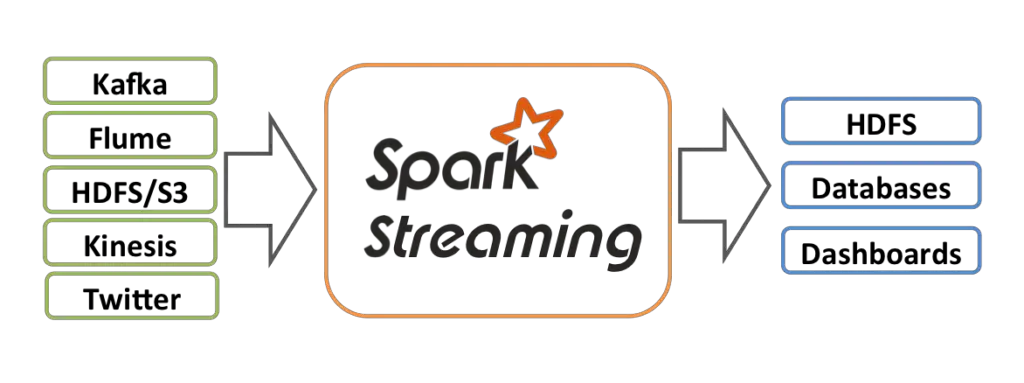

### Streaming from TCP Socket
Use readStream.format("socket") from Spark session object to read data from the socket and provide options host and port where you want to stream data from.

In [14]:
df = spark.readStream \
      .format("socket") \
      .option("host","localhost") \
      .option("port","9090") \
      .load()

Spark reads the data from the socket and represents it in a “value” column of DataFrame. df.printSchema() outputs schema. After processing, you can stream the DataFrame to console. In real-time, we ideally stream it to either Kafka, database e.t.c

In [15]:
df.printSchema()

root
 |-- value: string (nullable = true)



### Streaming from Kafka
Using Spark Streaming we can read from Kafka topic and write to Kafka topic in TEXT, CSV, AVRO and JSON formats

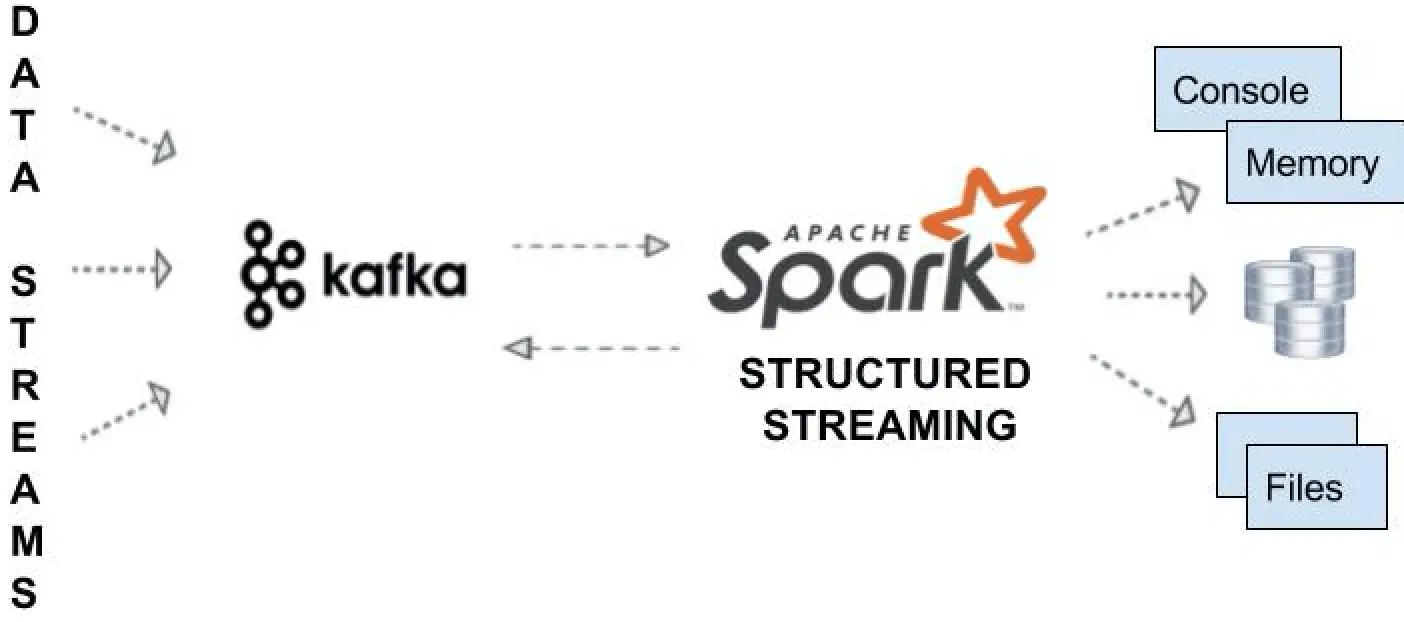

In [21]:
df = spark.readStream \
        .format("kafka") \
        .option("kafka.bootstrap.servers", "192.168.1.100:9092") \
        .option("subscribe", "json_topic") \
        .option("startingOffsets", "earliest") \
        .load()

AnalysisException: Failed to find data source: kafka. Please deploy the application as per the deployment section of "Structured Streaming + Kafka Integration Guide".;

In [23]:
df.selectExpr("CAST(id AS STRING) AS key", "to_json(struct(*)) AS value") \
   .writeStream \
   .format("kafka") \
   .outputMode("append") \
   .option("kafka.bootstrap.servers", "192.168.1.100:9092") \
   .option("topic", "josn_data_topic") \
   .start() \
   .awaitTermination()

AnalysisException: cannot resolve '`id`' given input columns: [value]; line 1 pos 5;
'Project [cast('id as string) AS key#191, to_json(struct(value, value#185), Some(Asia/Calcutta)) AS value#192]
+- StreamingRelationV2 org.apache.spark.sql.execution.streaming.sources.TextSocketSourceProvider@4fd3f399, socket, org.apache.spark.sql.execution.streaming.sources.TextSocketTable@6cdce6b1, org.apache.spark.sql.util.CaseInsensitiveStringMap@b8320f49, [value#185]


## PySpark MLlib

## PySpark GraphFrames
PySpark GraphFrames are introduced in Spark 3.0 version to support Graphs on DataFrame’s. Prior to 3.0, Spark has GraphX library which ideally runs on RDD and loses all Data Frame capabilities.

GraphFrames is a package for Apache Spark which provides DataFrame-based Graphs. It provides high-level APIs in Scala, Java, and Python. It aims to provide both the functionality of GraphX and extended functionality taking advantage of Spark DataFrames. This extended functionality includes motif finding, DataFrame-based serialization, and highly expressive graph queries.

GraphX works on RDDs whereas GraphFrames works with DataFrames.